<a href="https://colab.research.google.com/github/sachanneeraj/Hotels-Data-Analysis-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Some Basic Steps Before Starting Our EDA

# First Step- Firstly we will import all the important libraries which helps us in our Analysis process

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# Second Step - Now we will mount our google Drive and import the data into a variable form CSV File

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Now creating the Dataframe from the CSV file
Hotel_data = pd.read_csv('/content/drive/MyDrive/Hotel Booking - Neeraj Sachan/Hotel Bookings.csv')

# Third Step - Now we will check Whether our data is loaded successfull or not and then we will do some basic analysis of our data

In [12]:
#Lets check wheather DataFrame created successfully or not.
Hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
Hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [14]:
Hotel_data.shape

(119390, 32)

In [15]:
#Lets analyse the basic information of our DataFrame
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
#Now analyse some basic description of our DataFrame
Hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
Hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Results:



*  From the above operations we can clearly sees that the our data contains 119390 rows ans 32 variables(columns) out of which maximum columns don't have null values in it.
*   Two columns(Company and Agent) contains large number of null values.



# Fourth Step - Cleaning the data and handling the null values.

* Let we check the which columns has the most number of null values.
 



In [18]:
null_values = Hotel_data.isna().sum().sort_values(ascending=False).head(8).reset_index().rename({0:"number of null values"},axis=1)
null_values

,index,number of null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0




* As we can clearly see that only four columns(company,agent,country and children)contains the null vlues,But the "Company" and "agent" columns contains very large amount of null values i.e. 112593 and 16340 respectivily.So we can drop these columns 



In [19]:
Hotel_data.drop(['company','agent'],axis = 1,inplace = True)


In [20]:
Hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


*  We did not removed the country columns becouse it contain 488 null values out of 119390, which is negligible.So for dealing with these null values we will replace those null values with ABC


In [21]:
Hotel_data['country'] = Hotel_data['country'].fillna('ABC')

In [22]:
Hotel_data.shape

(119390, 30)

# Four children columns 4 rows have null values,which is very less.So we can replace these null values with 0.


In [23]:
Hotel_data['children'] = Hotel_data['children'].fillna(0)

In [24]:
Hotel_data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])



* Changing this column data type into integer



In [25]:
Hotel_data['children'] = Hotel_data['children'].astype(int)

In [26]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# Now our data is free from all the null values.

In [27]:
Hotel_data.isnull().sum().head(5)

hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
dtype: int64

# Now we are removing those rows in which total number of guests is equal to 0 i.e. adult+children+babies ==0

In [28]:
Hotel_data[(Hotel_data.children+Hotel_data.adults+Hotel_data.babies)==0].shape

(180, 30)



* 180 rows have total number of guests == 0



# Droping those 180 rows

In [29]:
Hotel_data = Hotel_data.drop(Hotel_data[(Hotel_data.children+Hotel_data.adults+Hotel_data.babies)==0].index)

# For reducing number of columns we can drop the columns namely adults children,babies and create a single columns in place of those namely Total number of guest.

In [30]:
Hotel_data['Total_number_of_guest'] = Hotel_data['adults']+Hotel_data['children']+Hotel_data['babies']
Hotel_data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_number_of_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1


In [31]:
Hotel_data.drop(['adults','children','babies'], axis = 1, inplace = True)

# Now our data is cleaned.Now we will do the EDA on in.

In [32]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   meal                            119210 non-null  object 
 10  country                         119210 non-null  object 
 11  market_segment                  119210 non-null  object 
 12  distribution_cha

# Q1. Which type of customers do more booking ?

In [33]:
#lets copy our cleaned data into our new variable data
data = Hotel_data.copy()

In [34]:
non_canceled = data[data['is_canceled']==0]
non_canceled.shape

(75011, 28)

In [35]:
non_canceled["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [36]:
customer_type = non_canceled['customer_type'].value_counts()
customer_type

Transient          52982
Transient-Party    18703
Contract            2810
Group                516
Name: customer_type, dtype: int64

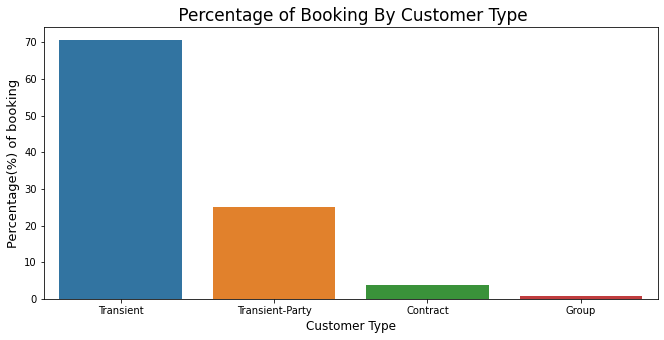

In [37]:
plt.figure(figsize=(11,5))
sns.barplot(x=customer_type.index,y =(customer_type.values*100)/non_canceled['customer_type'].count())
plt.xlabel("Customer Type", fontsize = 12)
plt.ylabel("Percentage(%) of booking", fontsize = 13)
plt.title(" Percentage of Booking By Customer Type", fontsize = 17)
plt.show()

# What do we see here ?
 

> Booking by Transient Customer is more than other type of Customers(approx. 70% of total bookings).



#  Q2. Let's have an overview which type of hotel generally people prefer to book ?

In [38]:
hotel_type = data["hotel"].value_counts().reset_index().rename(columns={"index":"Hotel Type", 'hotel': "Number of bookings"})
hotel_type

,Hotel Type,Number of bookings
0,City Hotel,79163
1,Resort Hotel,40047


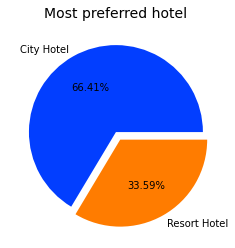

In [39]:
palette_color = sns.color_palette('bright')
plt.pie(x=hotel_type['Number of bookings'], labels=hotel_type['Hotel Type'], colors=palette_color, explode=[0,.1],autopct='%1.2f%%')
plt.title('Most preferred hotel', fontsize=14)
plt.show()

# What do we see here ?



* It seems that a huge proportion of hotel was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel

* Also , resort hotels tend to be appropriate for larger group of people













# Q3. Let's have an overview which type of deposit is more preferred by customers ?

In [40]:
deposit_type=data['deposit_type'].value_counts()
deposit_type

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

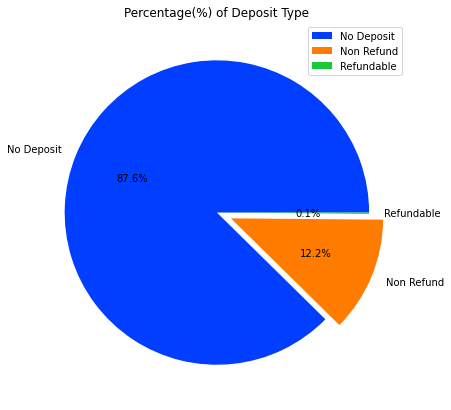

In [41]:
plt.figure(figsize=(14,7))
plt.pie(x=deposit_type.values, labels=deposit_type.index,colors=palette_color,  explode=[0,0.1,0], autopct='%1.1f%%')
plt.legend( labels=deposit_type.index, loc='best')
plt.title('Percentage(%) of Deposit Type')
plt.show()

# What do we see here ?
* 87.6% of guests prefer "No deposit" type of deposit.

# Q4.What kind of food is mostly preffered by the guest ?

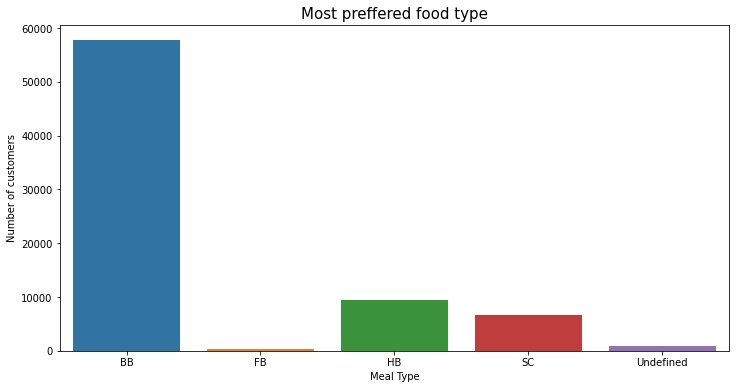

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x=non_canceled['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Number of customers')
plt.title('Most preffered food type', fontsize=15)
plt.show()

# What do we see here ?


*   So the most prefered food by the customers is BB(BED and BREAKFAST).
*   HB(HALF BOARD) and SC(SELF CATERING) are approx.equally prefered.[link text](https://)



# Q5. Let's have an overview how much guests pay for a room per night ?

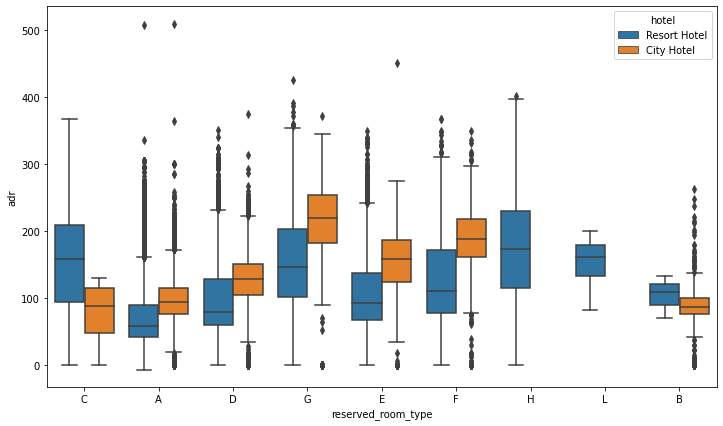

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x='reserved_room_type', y='adr', data=non_canceled, hue ='hotel')
plt.show()

# Observations


*   The figure shows that the average price per room depends on its type.

*   For Resorts G,H and C type of rooms are most costly.

*   For city hotels ,G type rooms are most costly.They are more expensive then the resort hotels.



# Q6. What is the most prefered room type ?


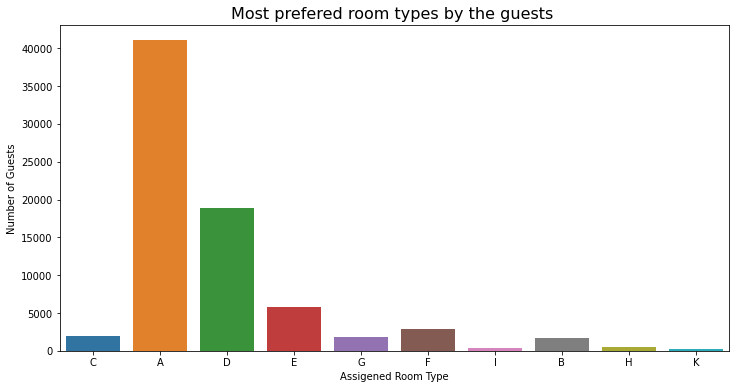

In [47]:
plt.figure(figsize = (12,6))
sns.countplot(x=non_canceled['assigned_room_type'])
plt.xlabel('Assigened Room Type')
plt.ylabel('Number of Guests')
plt.title('Most prefered room types by the guests ' , fontsize =16)
plt.show()

# What do we see here ?


*  THe most prefered room is A (Room Type)



#Q7. Looking into which countries mostly visitors are coming from ?

In [48]:
guest_country =non_canceled['country'].value_counts().reset_index().rename(columns={'index':'Country', 'country':'Number of guests'})
guest_country

,Country,Number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


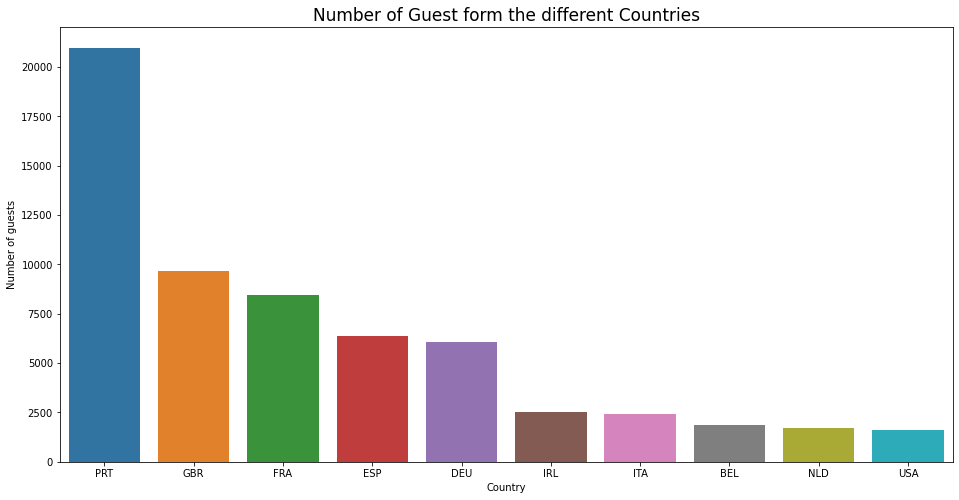

In [54]:
#plotting bar graph for the top 15 countries
plt.figure(figsize=(16,8))
sns.barplot(x=guest_country['Country'].head(10), y=guest_country['Number of guests'].head(10))
plt.title("Number of Guest form the different Countries",fontsize = 17)
plt.show()

# What do we see ?
 

*  We have large number of visitors form western europe and Portugal being the highest.
* We can instruct the marketing team target people of this region.
